In [13]:
from amftrack.pipeline.launching.run_super import (
    run_launcher,
    directory_scratch,
    directory_project,
    directory_project,
    run_parallel_stitch,
)
import os
from amftrack.util.sys import (
    get_dates_datetime,
    get_dirname,
    temp_path,
    get_data_info,
    update_plate_info,
    get_current_folders,
    get_folders_by_plate_id,
)
import sys

import os
from amftrack.pipeline.functions.image_processing.hyphae_id_surf import (
    resolve_anastomosis_crossing_by_root,
)
from amftrack.pipeline.functions.image_processing.experiment_class_surf import (
    Experiment,
    save_graphs,
)

import pandas as pd
import json
from time import time_ns
from amftrack.util.sys import temp_path
from amftrack.pipeline.functions.image_processing.experiment_util import (
    get_random_edge,
    distance_point_edge,
    plot_edge,
    plot_edge_cropped,
    find_nearest_edge,
    get_edge_from_node_labels,
    plot_full_image_with_features,
    get_all_edges,
    get_all_nodes,
    find_neighboring_edges,
    reconstruct_image,
    reconstruct_skeletton_from_edges,
    reconstruct_skeletton_unicolor,
    plot_edge_width,
    reconstruct_image_from_general,
    plot_full,
)

%matplotlib widget

directory_targ = os.path.join(directory_scratch, "stitch_temp2") + "/"

update_plate_info(directory_targ, local=True)
all_folders = get_current_folders(directory_targ, local=True)

analysed:   0%|          | 0/1773 [00:00<?, ?it/s]

In [5]:
exp = Experiment(directory_targ)
select_folders = all_folders.loc[(all_folders["unique_id"] == "127_20220705")]
select_folders = select_folders.sort_values("datetime")
select_folders = select_folders.iloc[:100]
exp.load(select_folders)

2022-07-05 18:10:00
2022-07-05 20:53:00
2022-07-05 22:54:00
2022-07-06 00:54:00
2022-07-06 02:54:00
2022-07-06 04:54:00
2022-07-06 06:53:00
2022-07-06 08:53:00
2022-07-06 19:01:00
2022-07-06 21:10:00
2022-07-06 23:10:00
2022-07-07 01:10:00
2022-07-07 03:10:00
2022-07-07 05:10:00
2022-07-07 07:09:00
2022-07-07 09:09:00
2022-07-07 11:02:00
2022-07-07 13:01:00
2022-07-07 15:19:00
2022-07-07 17:32:00
2022-07-07 19:32:00
2022-07-07 21:33:00
2022-07-07 23:33:00
2022-07-08 01:33:00
2022-07-08 03:33:00
2022-07-08 05:33:00
2022-07-08 07:33:00
2022-07-08 09:33:00
2022-07-08 11:33:00
2022-07-08 14:11:00
2022-07-08 16:12:00
2022-07-08 18:11:00
2022-07-08 20:11:00
2022-07-08 22:12:00
2022-07-09 00:12:00
2022-07-09 02:12:00
2022-07-09 04:12:00
2022-07-09 06:11:00
2022-07-09 08:11:00
2022-07-09 10:12:00
2022-07-09 12:12:00
2022-07-09 14:12:00
2022-07-09 16:12:00
2022-07-09 18:11:00
2022-07-09 20:11:00
2022-07-09 22:12:00
2022-07-10 00:12:00
2022-07-10 02:12:00
2022-07-10 04:12:00
2022-07-10 06:11:00


In [6]:
from amftrack.pipeline.functions.post_processing.exp_plot import plot_hulls
from amftrack.pipeline.functions.post_processing.extract_study_zone import (
    load_study_zone,
)
from amftrack.pipeline.functions.post_processing.area_hulls import (
    get_regular_hulls_area_fixed,
)

In [7]:
exp.save_location = "None"

load_study_zone(exp)
# plot_hulls(exp)

In [10]:
ts = range(exp.ts)
incr = 100
regular_hulls, indexes = get_regular_hulls_area_fixed(exp, ts, incr)

In [11]:
from amftrack.pipeline.functions.image_processing.experiment_util import (
    plot_full_image_with_features,
    get_all_edges,
    get_all_nodes,
    plot_hulls_skelet,
    plot_full,
    reconstruct_image_from_general,
)

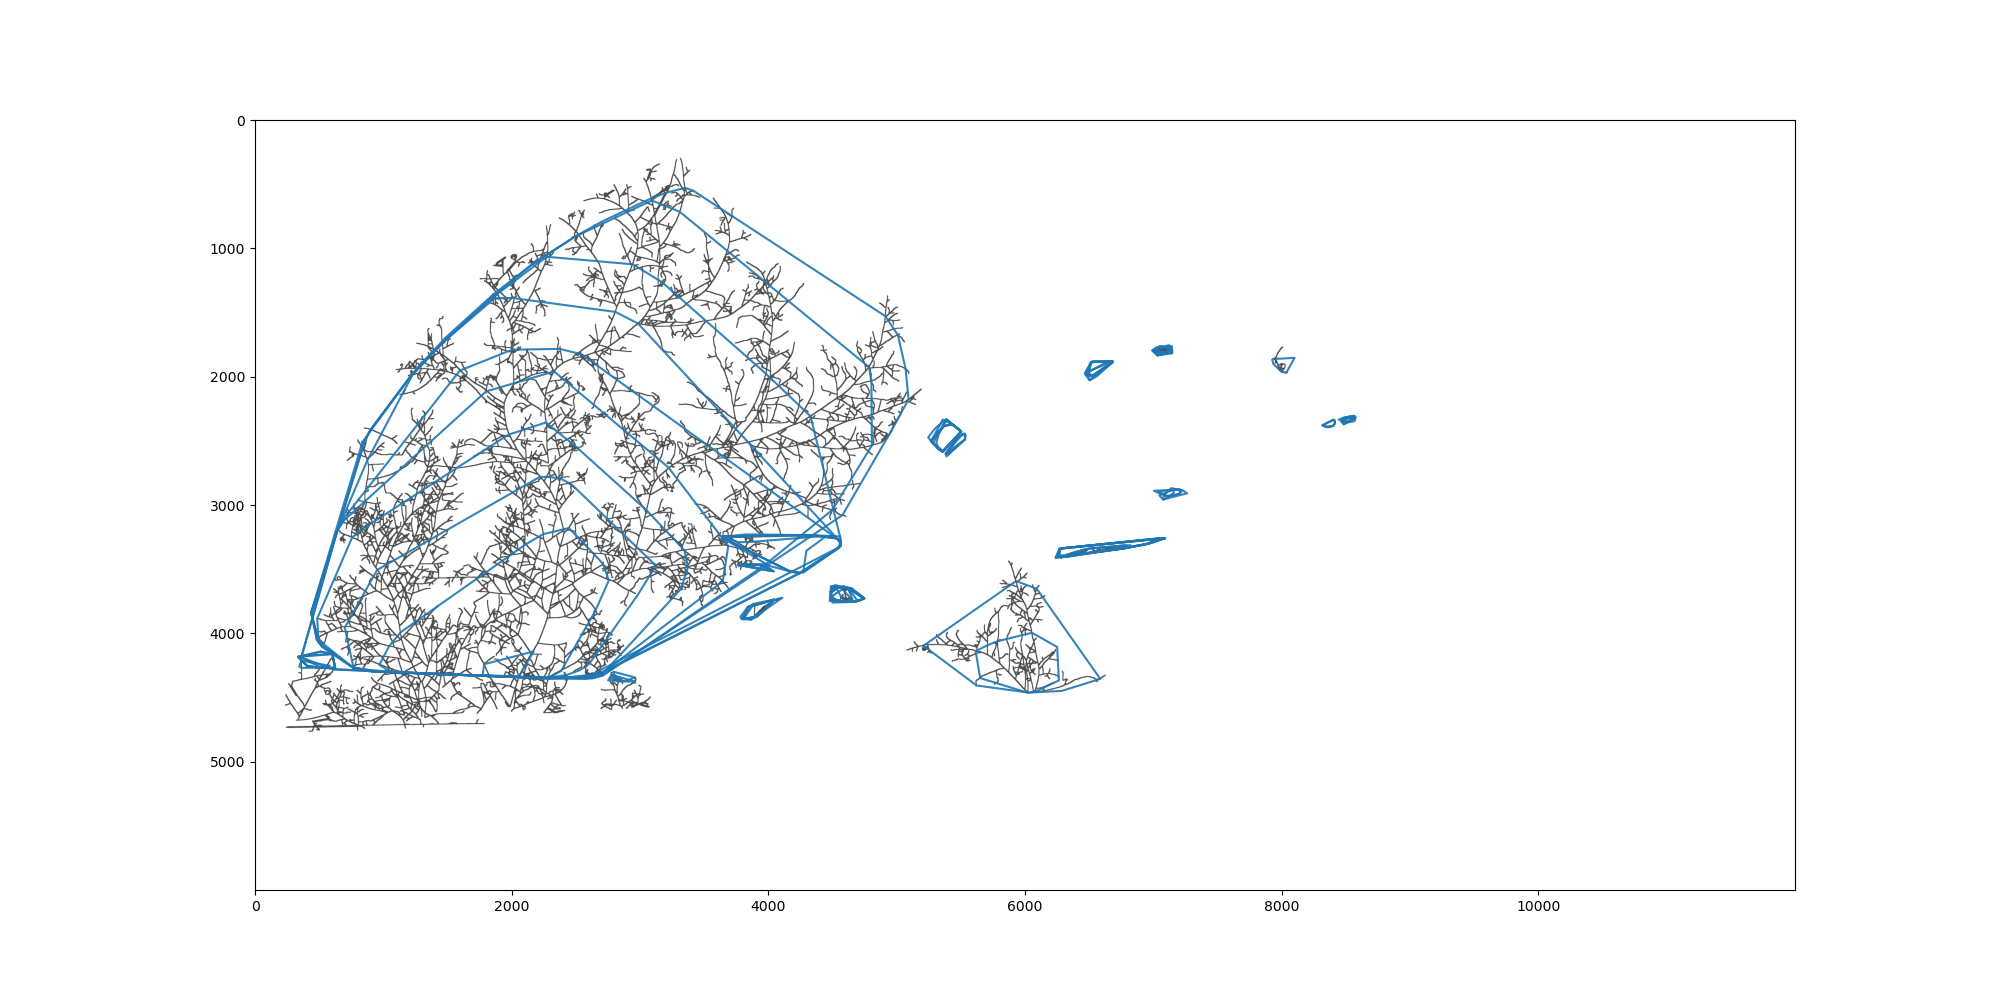

In [16]:
plot_hulls_skelet(exp, 90, regular_hulls)

In [20]:
from amftrack.pipeline.functions.post_processing.time_plate import *
from amftrack.pipeline.functions.post_processing.area_hulls import *

get_density_in_ring(exp, 60, {"incr": 100, "i": 5})

('ring_density_incr-100_index-5', 486.6884540582355)

In [22]:
select_folders["folder"]

762     20220705_1810_Plate17
780     20220705_2053_Plate17
703     20220705_2254_Plate17
410     20220706_0054_Plate17
1402    20220706_0254_Plate17
                ...          
1709    20220715_0040_Plate17
432     20220715_0240_Plate17
723     20220715_0440_Plate17
923     20220715_0640_Plate17
1212    20220715_0840_Plate17
Name: folder, Length: 100, dtype: object